# DFS & BFS
https://contest.yandex.ru/contest/44005/problems/

## Connected Components

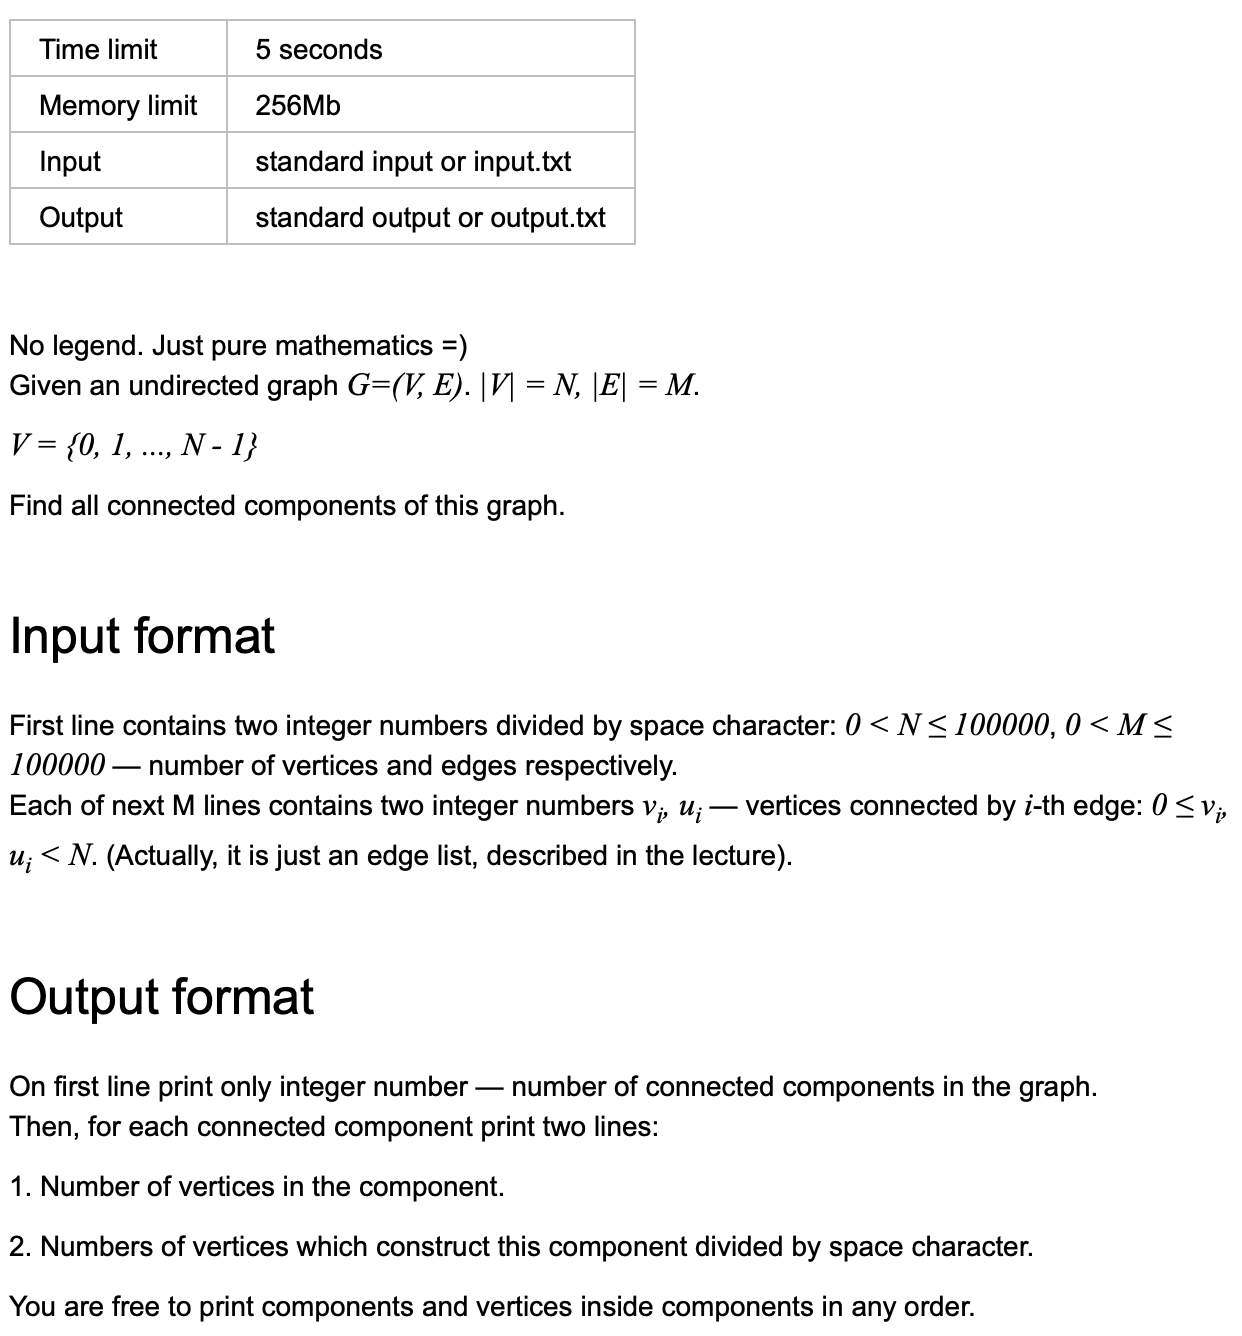

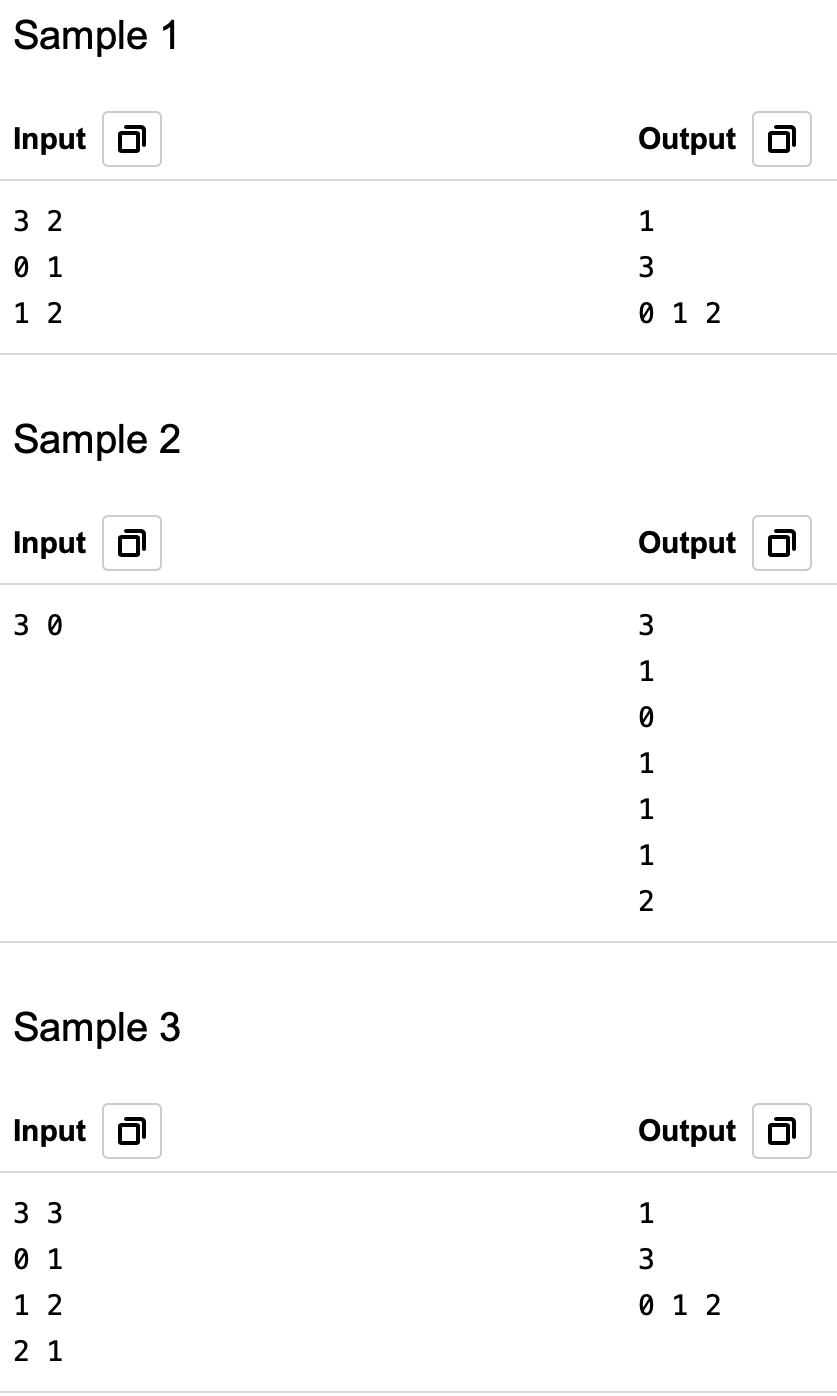

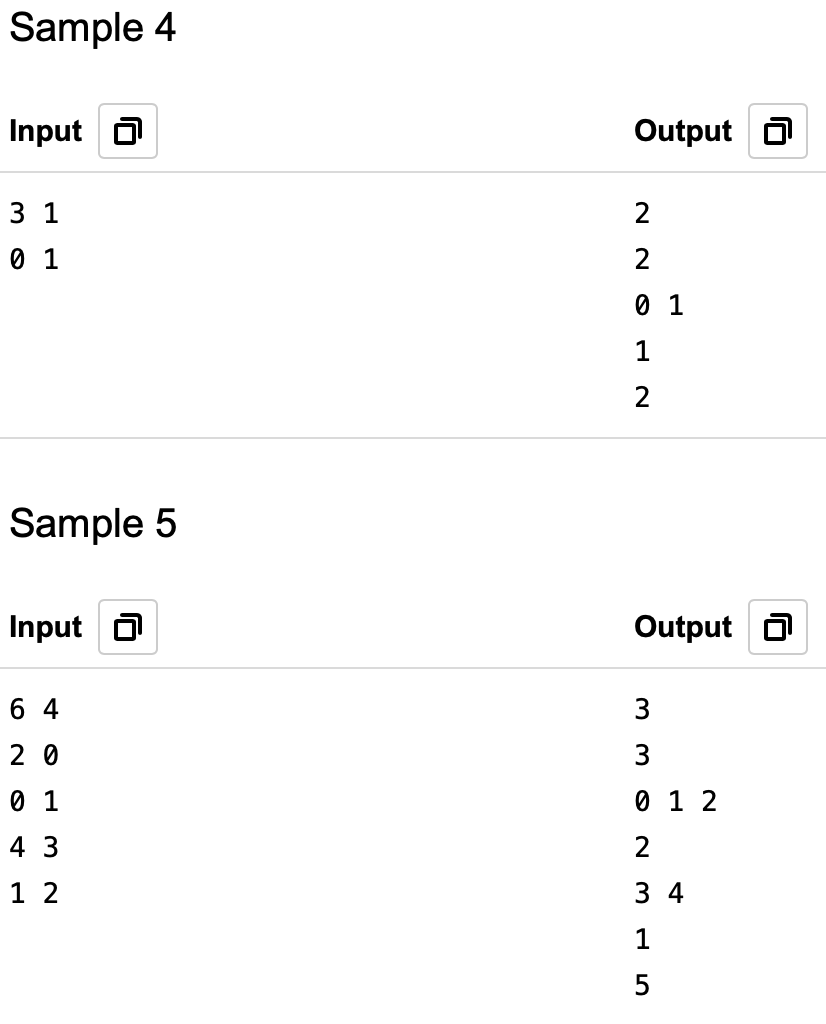

In [ ]:
import sys
sys.setrecursionlimit(100000)

n, m = list(map(int, input().split()))

graph = dict()
for i in range(n):
    graph[str(i)] = []

for i in range(m):
    n1, n2 = input().split()
    if n1 in graph and n2 in graph:
        graph[n1].append(n2)
        graph[n2].append(n1)

visited = set()


def dfs(visited, graph, node, nodes=set()):
    if node not in visited:
        nodes.add(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour, nodes)


result = []
for node in graph:
    if node not in visited:
        nodes = set()
        dfs(visited, graph, node, nodes)
        result.append((len(nodes), ' '.join(nodes)))

print(len(result))
if len(result) > 0:
    for i, j in result:
        print(i)
        print(j)


## Park

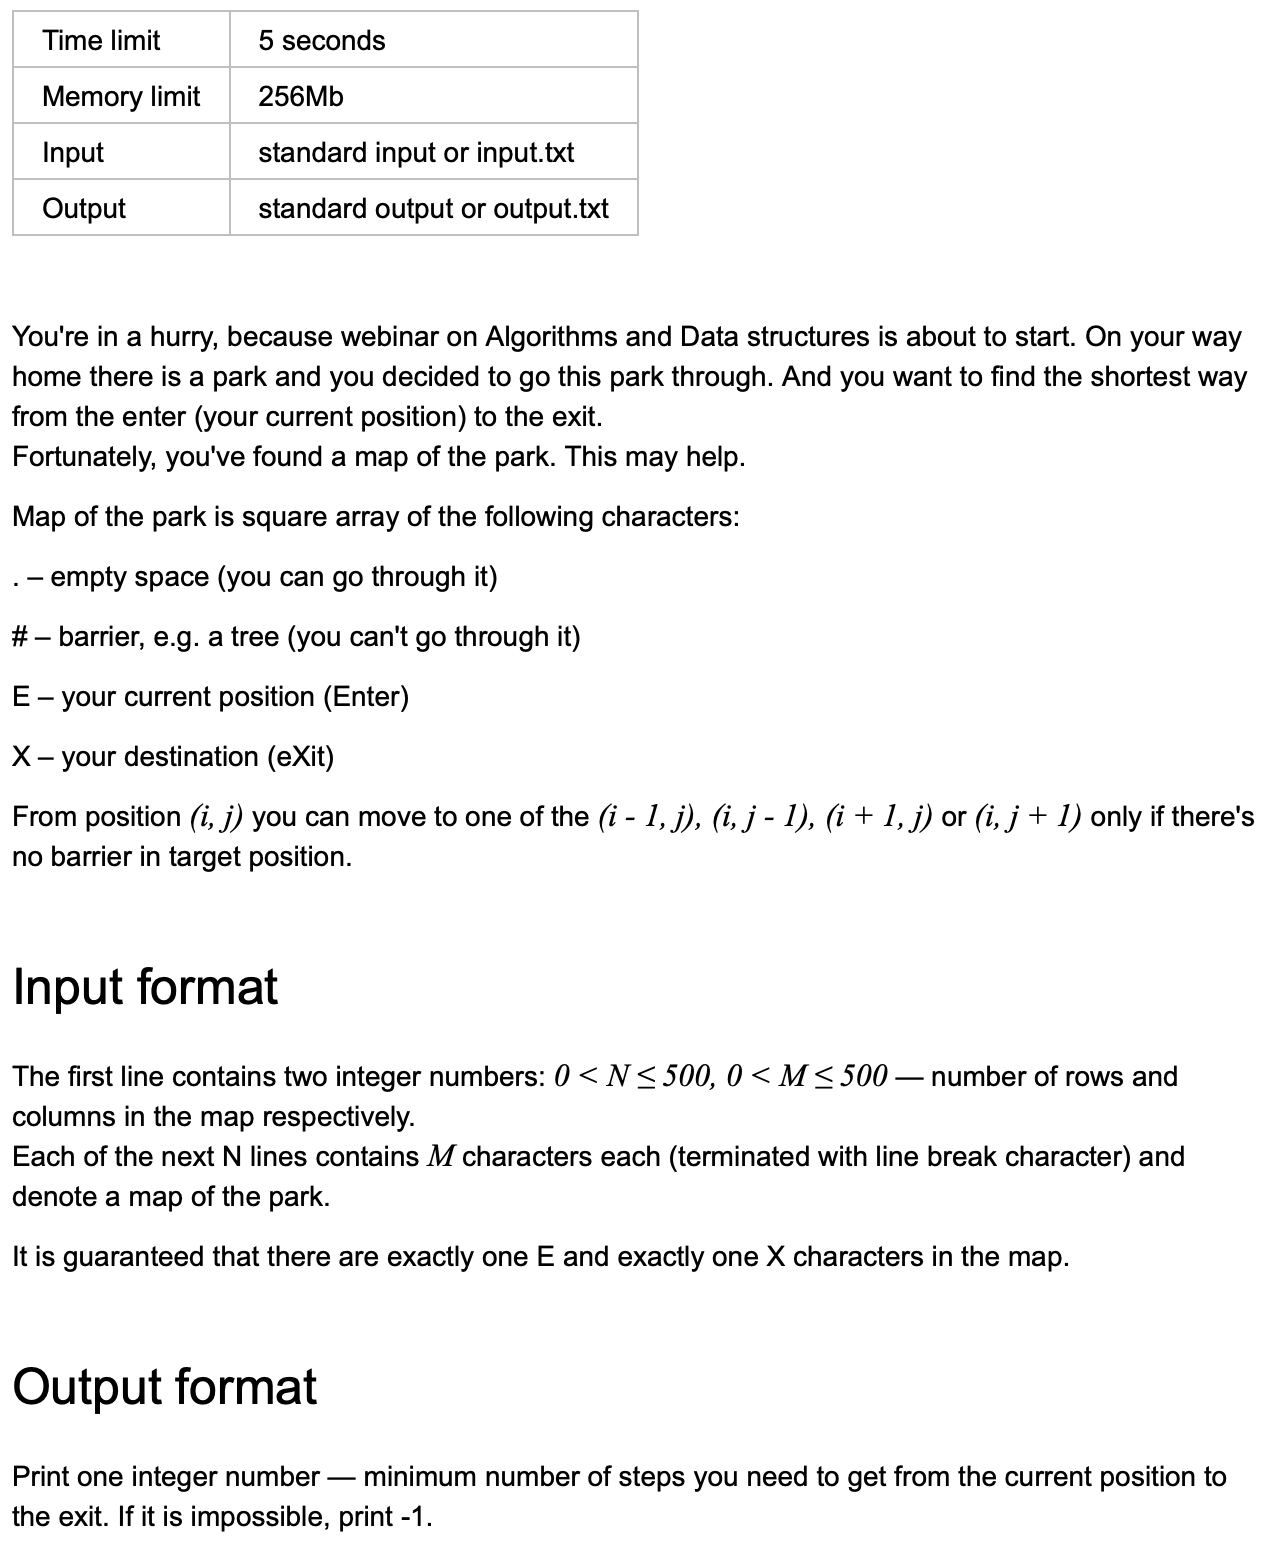

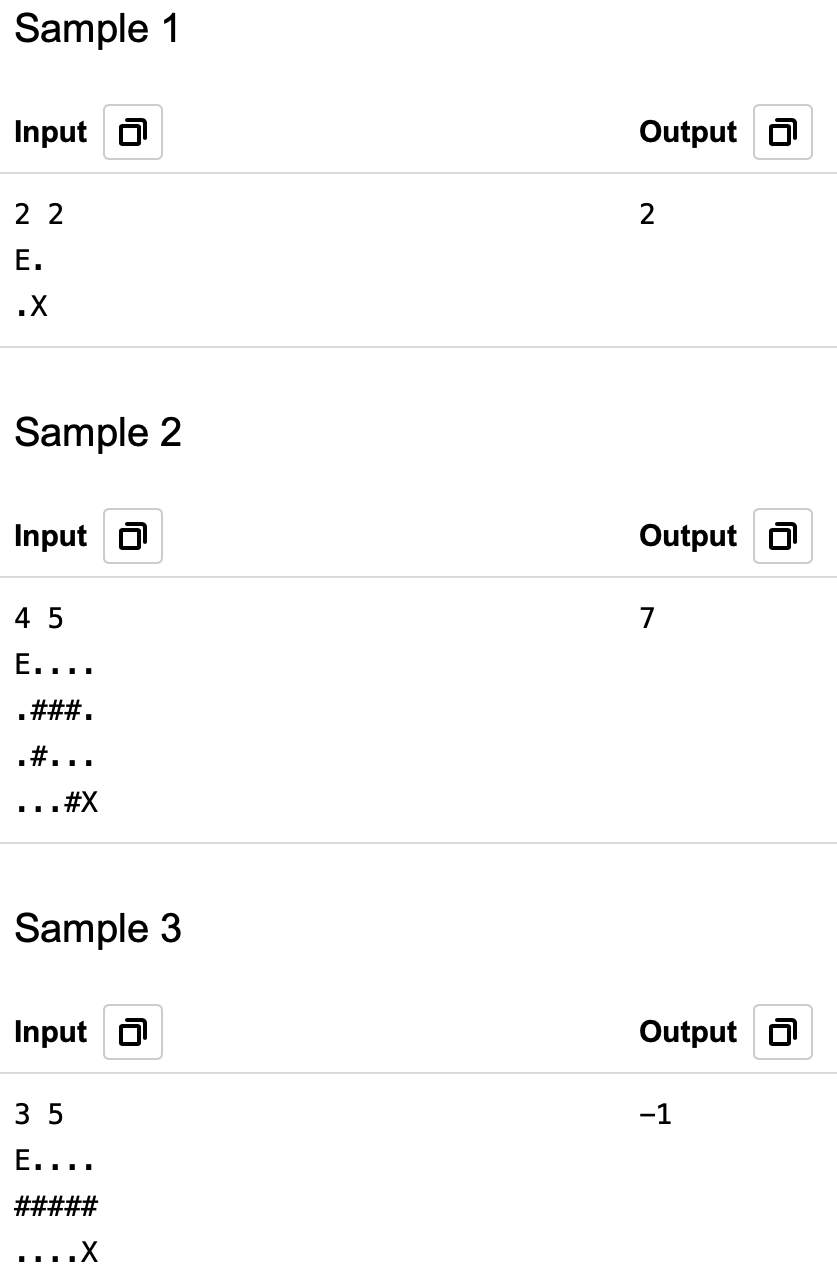

In [ ]:
n, m = list(map(int, input().split()))

matrix = [[1 for i in range(m)] for j in range(n)]
graph = [[] for i in range(n * m)]

for i in range(n):
    row = input()
    for j in range(m):

        if row[j] == 'E':
            start_point = i * m + j
        elif row[j] == 'X':
            finish_point = i * m + j
        elif row[j] == '#':
            matrix[i][j] = 0
        if row[j] != '#':
            if matrix[i - 1][j] != 0 and i > 0:
                graph[i * m + j].append((i - 1) * m + j)
                graph[(i - 1) * m + j].append(i * m + j)
            if matrix[i][j - 1] != 0 and j > 0:
                graph[i * m + j].append(i * m + j - 1)
                graph[i * m + j - 1].append(i * m + j)

level = [-1] * len(graph)


def bfs(s):
    global level
    level[s] = 0
    queue = [s]
    while queue:
        v = queue.pop(0)
        for w in graph[v]:
            if level[w] == -1:
                queue.append(w)
                level[w] = level[v] + 1


bfs(start_point)

print(level[finish_point])
